In [4]:
import matplotlib as plt
%matplotlib inline
import pandas_datareader as pdr
import fix_yahoo_finance as yf
pdr.data.get_data_yahoo = lambda *a, **kw: yf.download(*a, **kw, progress=False)
import bt

In [7]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-01')
data.head()

,spy,agg
Date,,
2009-12-31,93.934990,82.249107
2010-01-04,95.528107,82.344780
2010-01-05,95.780975,82.719368
2010-01-06,95.848396,82.671570
2010-01-07,96.253014,82.575928


In [8]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

In [9]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

C:\ProgramData\Anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)
C:\ProgramData\Anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


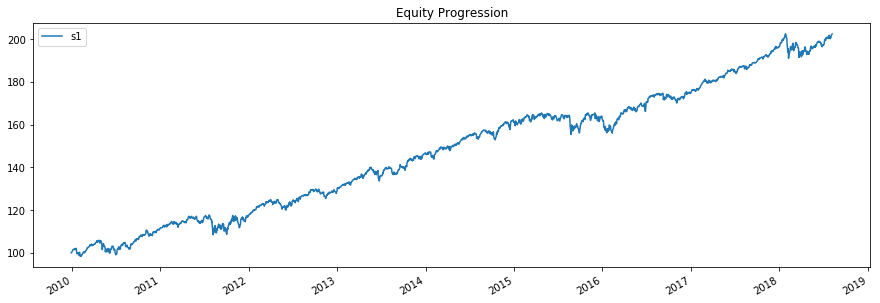

In [10]:
# first let's see an equity curve
res.plot()

In [11]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2009-12-30
End                  2018-08-07
Risk-free rate       0.00%

Total Return         102.39%
Daily Sharpe         1.21
Daily Sortino        1.93
CAGR                 8.54%
Max Drawdown         -7.83%
Calmar Ratio         1.09

MTD                  0.77%
3m                   4.07%
6m                   3.90%
YTD                  3.17%
1Y                   7.90%
3Y (ann.)            7.41%
5Y (ann.)            7.73%
10Y (ann.)           8.54%
Since Incep. (ann.)  8.54%

Daily Sharpe         1.21
Daily Sortino        1.93
Daily Mean (ann.)    8.45%
Daily Vol (ann.)     7.01%
Daily Skew           -0.43
Daily Kurt           4.02
Best Day             2.48%
Worst Day            -3.11%

Monthly Sharpe       1.44
Monthly Sortino      3.14
Monthly Mean (ann.)  8.33%
Monthly Vol (ann.)   5.76%
Monthly Skew         -0.02
Monthly Kurt         0.40
Best Month           5.70%
Worst Month          -3.39%

Yearly Sharpe  

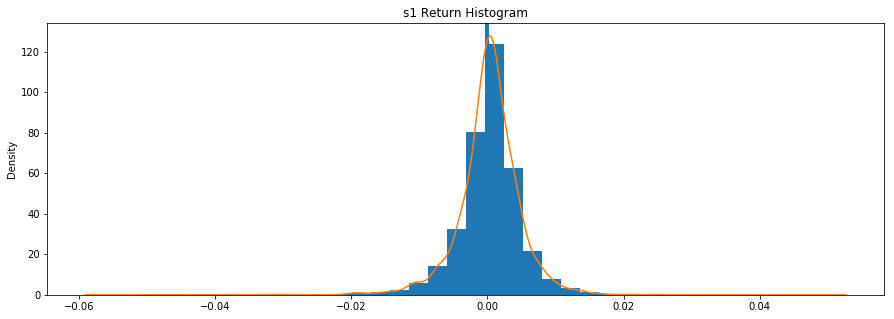

In [12]:
# ok and how does the return distribution look like?
res.plot_histogram()

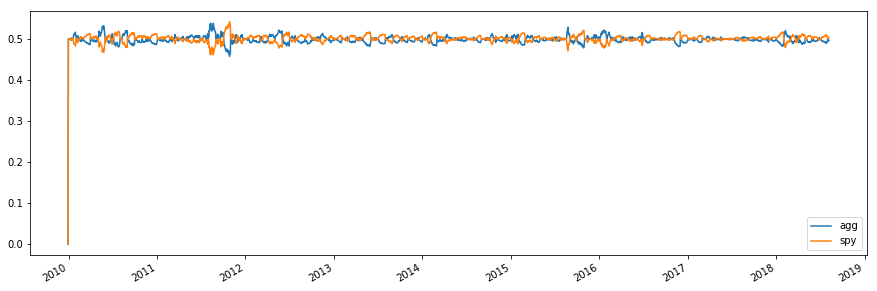

In [13]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

s2
0% [############################# ] 100% | ETA: 00:00:00

C:\ProgramData\Anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)
C:\ProgramData\Anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


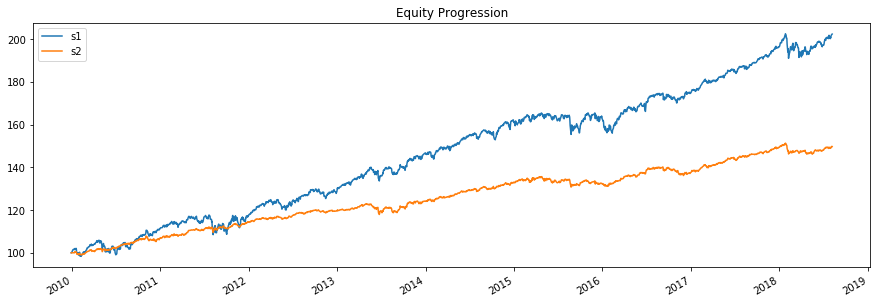

In [14]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot()

In [15]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2009-12-30  2009-12-30
End                  2018-08-07  2018-08-07
Risk-free rate       0.00%       0.00%

Total Return         102.39%     49.74%
Daily Sharpe         1.21        1.47
Daily Sortino        1.93        2.41
CAGR                 8.54%       4.80%
Max Drawdown         -7.83%      -4.07%
Calmar Ratio         1.09        1.18

MTD                  0.77%       0.38%
3m                   4.07%       1.99%
6m                   3.90%       1.54%
YTD                  3.17%       0.31%
1Y                   7.90%       3.03%
3Y (ann.)            7.41%       3.79%
5Y (ann.)            7.73%       4.36%
10Y (ann.)           8.54%       4.80%
Since Incep. (ann.)  8.54%       4.80%

Daily Sharpe         1.21        1.47
Daily Sortino        1.93        2.41
Daily Mean (ann.)    8.45%       4.75%
Daily Vol (ann.)     7.01%       3.24%
Daily Skew           -0.43       -0.35
Daily Kurt   